# Exercise 6.5 - Gerardo Pérez

# 1. Library import

In [72]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pylab as pl

In [74]:
%matplotlib inline

In [76]:
path = r'C:\Users\geram\OneDrive\Escritorio\Data Analysis\Coral Bleaching'

In [7]:
path

'C:\\Users\\geram\\OneDrive\\Escritorio\\Data Analysis\\Coral Bleaching'

# 2. Data import and cleaning

In [78]:
coral_bleach = pd.read_csv(r'C:\Users\geram\OneDrive\Escritorio\Data Analysis\Coral Bleaching\Coral Bleaching Project updated - Gerardo Pérez.csv', delimiter=';', index_col=False)

In [80]:
coral_bleach.head()

,Sample_ID,Cyclone_Frequency,Depth_m,Ocean_Name,Country_Name,Distance_to_Shore,Exposure,Turbidity,Date_Year,Bleaching_Level,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,10327299,"51,07","50,30",Pacific,Papua New Guinea,"706,63",Sometimes,"0,04",1998,Colony,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10327298,"50,90","50,00",Pacific,Papua New Guinea,"3276,02",Sheltered,"0,04",1998,Colony,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10327115,"61,03","42,70",Atlantic,Netherlands Antilles,"1422,68",Sometimes,"0,03",2005,Colony,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10327430,"39,16","42,00",Indian,Sri Lanka,"976,53",Exposed,"0,07",1998,Colony,...,NaN,Descriptive Statistics,Cyclone_Frequency,Depth_m,Distance_to_Shore,Turbidity,Date_Year,Temperature_Maximum,Percent_Bleaching,Temperature_Mean
4,10327784,"69,08","40,00",Atlantic,United States,"296,21",Exposed,"0,04",2005,Colony,...,NaN,Mean,"52,56634441","7,057877964","3011,037978","0,074959839",NaN,NaN,NaN,NaN


In [82]:
Columns_Info = coral_bleach.columns.tolist()

In [84]:
print(Columns_Info)

['Sample_ID', 'Cyclone_Frequency', 'Depth_m', 'Ocean_Name', 'Country_Name', 'Distance_to_Shore', 'Exposure', 'Turbidity', 'Date_Year', 'Bleaching_Level', 'Temperature_Maximum', 'Percent_Bleaching', 'Temperature_Mean', 'Realm_Name', 'Percent_Cover', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25']


In [86]:
coral_bleach.drop(columns=['Sample_ID', 'Ocean_Name', 'Country_Name', 'Exposure', 'Realm_Name', 'Percent_Cover','Unnamed: 15','Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], inplace=True)

In [106]:
coral_bleach.drop(columns=['Bleaching_Level'], inplace=True)

In [108]:
coral_bleach_2010_2019 = coral_bleach[coral_bleach['Date_Year'].between(2010, 2019)]

In [110]:
coral_bleach_2010_2019.head()

,Cyclone_Frequency,Depth_m,Distance_to_Shore,Turbidity,Date_Year,Temperature_Maximum,Percent_Bleaching,Temperature_Mean
64,"33,22","29,90","3312,00","0,07",2012,"304,72",0%,"299,70"
79,"88,08","27,00","2118,00","0,05",2012,"304,61",430%,"299,70"
80,"33,22","26,00","3472,00","0,05",2015,"304,67",351%,"299,70"
81,"41,60","25,90","3316,00","0,06",2012,"304,72",833%,"299,70"
82,"57,84","25,60","2207,00","0,05",2011,"304,57",1111%,"299,69"


In [112]:
print(coral_bleach_2010_2019.dtypes)

Cyclone_Frequency      object
Depth_m                object
Distance_to_Shore      object
Turbidity              object
Date_Year               int64
Temperature_Maximum    object
Percent_Bleaching      object
Temperature_Mean       object
dtype: object


In [114]:
# Removing commas and percentage signs, converting data types:

coral_bleach_2010_2019['Cyclone_Frequency'] = pd.to_numeric(coral_bleach_2010_2019['Cyclone_Frequency'].astype(str).str.replace(',', '.', regex=False), errors='coerce')
coral_bleach_2010_2019['Percent_Bleaching'] = pd.to_numeric(coral_bleach_2010_2019['Percent_Bleaching'].astype(str).str.replace('%', '', regex=False), errors='coerce')
coral_bleach_2010_2019['Depth_m'] = pd.to_numeric(coral_bleach_2010_2019['Depth_m'].astype(str).str.replace(',', '.', regex=False), errors='coerce')
coral_bleach_2010_2019['Distance_to_Shore'] = pd.to_numeric(coral_bleach_2010_2019['Distance_to_Shore'].astype(str).str.replace(',', '.', regex=False), errors='coerce')
coral_bleach_2010_2019['Turbidity'] = pd.to_numeric(coral_bleach_2010_2019['Turbidity'].astype(str).str.replace(',', '.', regex=False), errors='coerce')
coral_bleach_2010_2019['Temperature_Maximum'] = pd.to_numeric(coral_bleach_2010_2019['Temperature_Maximum'].astype(str).str.replace(',', '.', regex=False), errors='coerce')
coral_bleach_2010_2019['Temperature_Mean'] = pd.to_numeric(coral_bleach_2010_2019['Temperature_Mean'].astype(str).str.replace(',', '.', regex=False), errors='coerce')
coral_bleach_2010_2019['Date_Year'] = pd.to_numeric(coral_bleach_2010_2019['Date_Year'].astype(str).str.replace(',', '.', regex=False), errors='coerce')

C:\Users\geram\AppData\Local\Temp\ipykernel_16032\1852541574.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coral_bleach_2010_2019['Cyclone_Frequency'] = pd.to_numeric(coral_bleach_2010_2019['Cyclone_Frequency'].astype(str).str.replace(',', '.', regex=False), errors='coerce')
C:\Users\geram\AppData\Local\Temp\ipykernel_16032\1852541574.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coral_bleach_2010_2019['Percent_Bleaching'] = pd.to_numeric(coral_bleach_2010_2019['Percent_Bleaching'].astype(str).s

In [116]:
coral_bleach_2010_2019.shape

(14604, 8)

In [98]:
coral_bleach_2010_2019.isnull().sum()

Cyclone_Frequency      0
Depth_m                0
Distance_to_Shore      0
Turbidity              0
Date_Year              0
Bleaching_Level        0
Temperature_Maximum    0
Percent_Bleaching      0
Temperature_Mean       0
dtype: int64

In [118]:
dups = coral_bleach_2010_2019.duplicated()

In [120]:
dups.shape

(14604,)

In [ ]:
# Data has been cleaned, transformed to numeric and non-numeric variables have been dropped

In [122]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(coral_bleach_2010_2019)

# 3. Elbow Technique

In [124]:
num_cl = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [126]:
score = [kmeans[i].fit(coral_bleach_2010_2019).score(coral_bleach_2010_2019) for i in range(len(kmeans))]

In [128]:
score

[-1152172695221.3623,
 -512691872793.4247,
 -177339044990.08154,
 -97556091040.41243,
 -79219736018.51204,
 -63263004417.122765,
 -44861814502.46744,
 -32564843389.72931,
 -27764202561.178017]

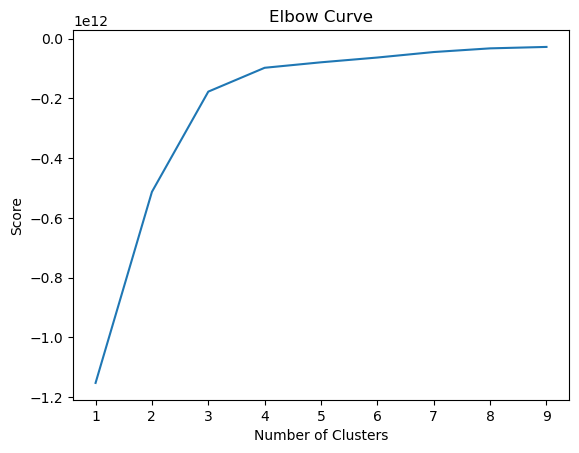

In [130]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# 4. Results discussion

In [ ]:
# I will choose as number of clusters 4, as this is when the line reaches its peak and then becomes more stable

# 5. K-means algorithm

In [132]:
kmeans = KMeans(n_clusters = 4) 

In [134]:
kmeans.fit(coral_bleach_2010_2019)

KMeans(n_clusters=4)

# 6. New Clusters column

In [136]:
coral_bleach_2010_2019['clusters'] = kmeans.fit_predict(coral_bleach_2010_2019)

C:\Users\geram\AppData\Local\Temp\ipykernel_16032\4207345053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coral_bleach_2010_2019['clusters'] = kmeans.fit_predict(coral_bleach_2010_2019)


In [138]:
coral_bleach_2010_2019.head()

,Cyclone_Frequency,Depth_m,Distance_to_Shore,Turbidity,Date_Year,Temperature_Maximum,Percent_Bleaching,Temperature_Mean,clusters
64,33.22,29.9,3312.0,0.07,2012,304.72,0,299.70,3
79,88.08,27.0,2118.0,0.05,2012,304.61,430,299.70,3
80,33.22,26.0,3472.0,0.05,2015,304.67,351,299.70,3
81,41.60,25.9,3316.0,0.06,2012,304.72,833,299.70,3
82,57.84,25.6,2207.0,0.05,2011,304.57,1111,299.69,3


In [140]:
coral_bleach_2010_2019['clusters'].value_counts()

clusters
3    12400
0     1837
2      337
1       30
Name: count, dtype: int64

# 7. Visualizations

In [176]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=coral_bleach_2010_2019['Cyclone_Frequency'], y=coral_bleach_2010_2019['Percent_Bleaching'], hue = kmeans.labels_, s=100)

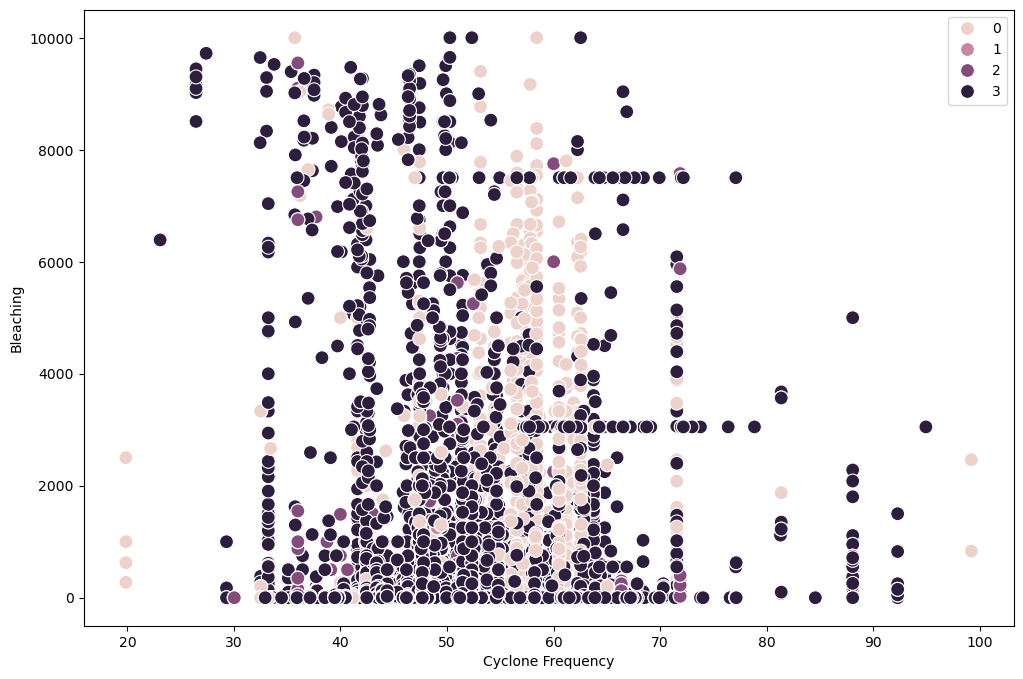

In [178]:
ax.grid(False)
plt.xlabel('Cyclone Frequency')
plt.ylabel('Bleaching')
plt.show()

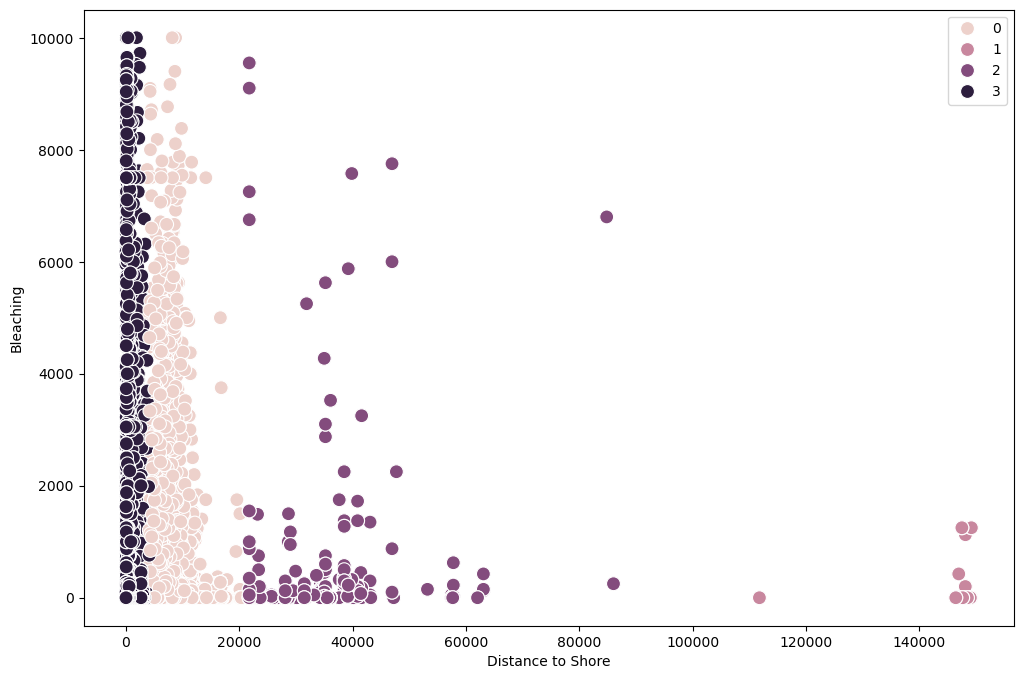

In [180]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=coral_bleach_2010_2019['Distance_to_Shore'], y=coral_bleach_2010_2019['Percent_Bleaching'], hue = kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('Distance to Shore')
plt.ylabel('Bleaching')
plt.show()

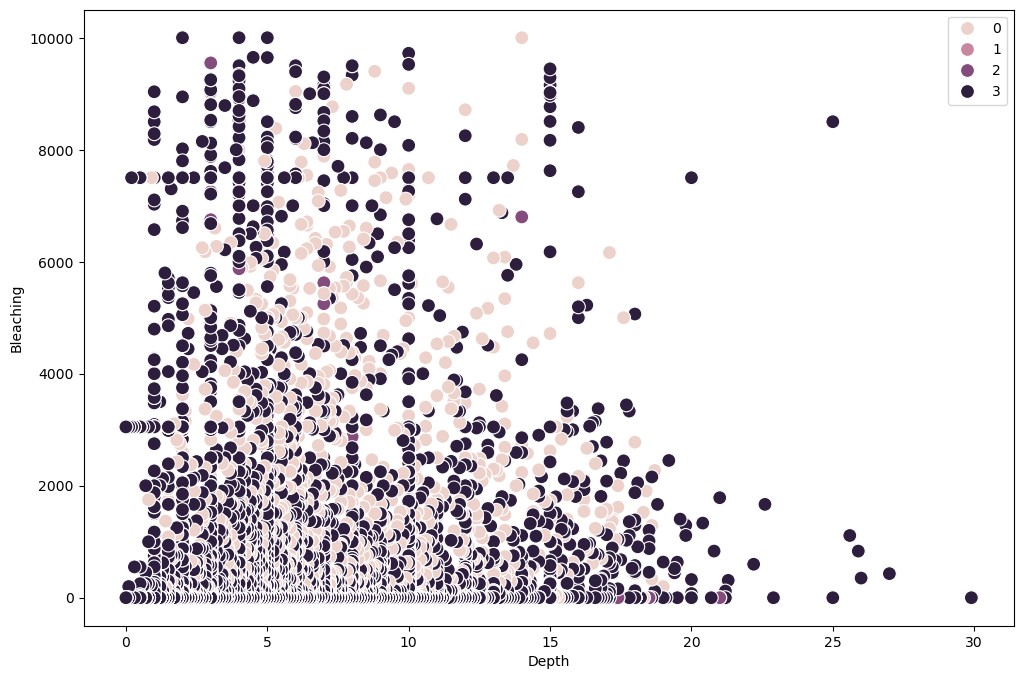

In [182]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=coral_bleach_2010_2019['Depth_m'], y=coral_bleach_2010_2019['Percent_Bleaching'], hue = kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('Depth')
plt.ylabel('Bleaching')
plt.show()

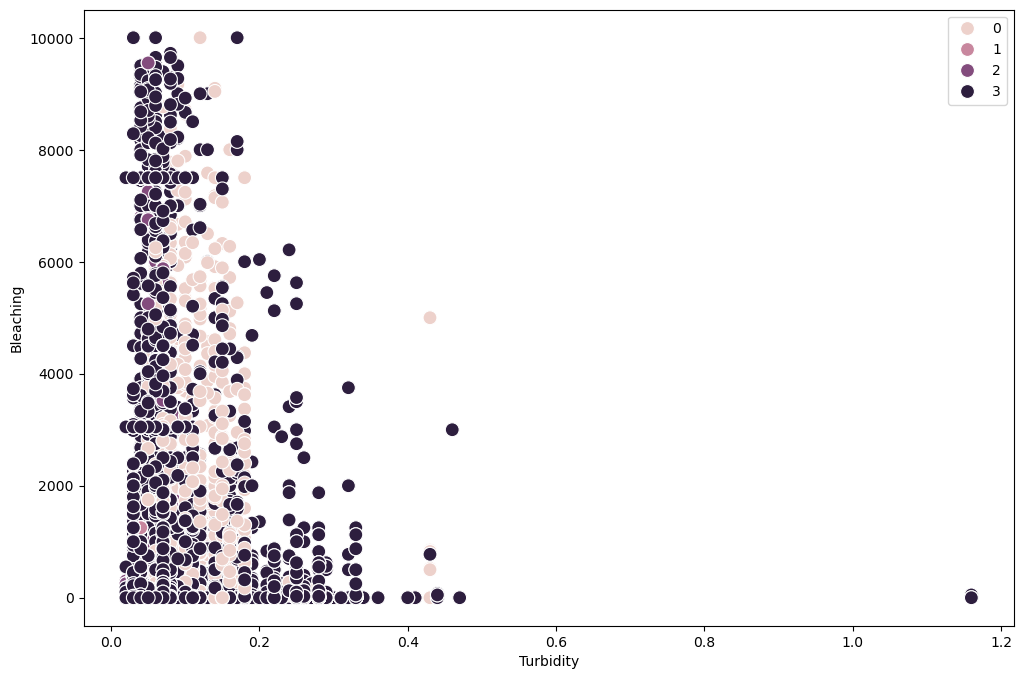

In [188]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=coral_bleach_2010_2019['Turbidity'], y=coral_bleach_2010_2019['Percent_Bleaching'], hue = kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('Turbidity')
plt.ylabel('Bleaching')
plt.show()

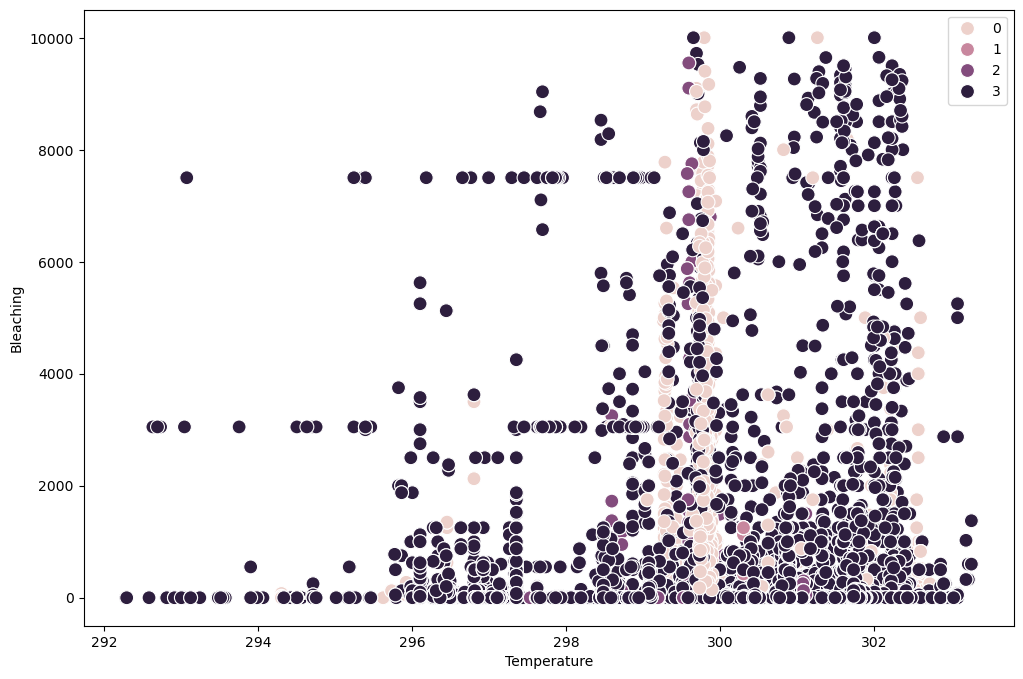

In [186]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=coral_bleach_2010_2019['Temperature_Mean'], y=coral_bleach_2010_2019['Percent_Bleaching'], hue = kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('Temperature')
plt.ylabel('Bleaching')
plt.show()

# 8. Results discussion

In [ ]:
# Distance to shore and turbidity seem to show the strongest relationship within bleaching
# Higher turbidity levels and a further distance to the shore tend to have a decreased likelihoof of coral bleaching
# All other variables remain too widely spread in order to make a definitve cause for them when it comes to coral bleaching
# Multivariable analysis and similar would be needed to discover these nuances in the data

# 9. Descriptive Statistics

In [160]:
coral_bleach_2010_2019.loc[coral_bleach_2010_2019['clusters'] == 3, 'clusters'] = 'dark purple'
coral_bleach_2010_2019.loc[coral_bleach_2010_2019['clusters'] == 2, 'clusters'] = 'purple'
coral_bleach_2010_2019.loc[coral_bleach_2010_2019['clusters'] == 1, 'clusters'] = 'light purple'
coral_bleach_2010_2019.loc[coral_bleach_2010_2019['clusters'] == 0, 'clusters'] = 'light pink'

C:\Users\geram\AppData\Local\Temp\ipykernel_16032\3575763451.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'dark purple' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  coral_bleach_2010_2019.loc[coral_bleach_2010_2019['clusters'] == 3, 'clusters'] = 'dark purple'


In [190]:
coral_bleach_2010_2019.groupby('clusters').agg({'Cyclone_Frequency':['mean', 'median'], 
                         'Depth_m':['mean', 'median'], 
                         'Distance_to_Shore':['mean', 'median'],
                          'Turbidity': ['mean', 'median'],                 
                          'Temperature_Mean':['mean', 'median']})

Cyclone_Frequency          Depth_m        Distance_to_Shore  \
                          mean median      mean median              mean   
clusters                                                                   
dark purple          51.783012  50.78  6.540587    6.0        585.227552   
light pink           54.696434  55.20  7.867365    7.6       7687.010773   
light purple         49.392667  49.07  3.080000    2.5     145644.555333   
purple               49.847953  48.94  6.756677    6.0      34457.949585   

                        Turbidity        Temperature_Mean          
                 median      mean median             mean  median  
clusters                                                           
dark purple      190.68  0.077007   0.06       300.583473  301.12  
light pink      6903.57  0.101998   0.08       300.360729  299.84  
light purple  148083.17  0.038667   0.04       300.193333  300.30  
purple         34300.42  0.062404   0.06       300.034154  299.63

# 10. Results discussion

In [ ]:
# Dark Purple:

#High cyclone frequency (mean: 51.8) and moderate temperature
#Larger distances to shore (mean: 6.5 km)
#Low turbidity (mean: 0.077)
#Moderate temperature mean (300.58)
#Insight: Likely represents areas with moderate environmental stress and more favorable conditions for coral growth.

#Light Pink:

#High turbidity (mean: 7687) and temperature (300.36)
#Low cyclone frequency (mean: 54.7)
#Insight: Likely represents disturbed environments with high pollution or weather extremes.

#Light Purple:

#Very high temperature values (mean: 145644)
#Low cyclone frequency and turbidity
#Insight: Could represent extremely stressed environments with heavy bleaching risk.

#Purple:

#High temperature (mean: 34458) but moderate cyclone frequency and turbidity
#Insight: Likely areas with high disturbance, especially regarding thermal stress.